参考: https://qiita.com/maskot1977/items/b2cfb369f60ad02887b0

ライブラリのインストール

In [47]:
import numpy as np
import pandas as pd
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import plotting

In [48]:
# 機械学習関連のライブラリ群

# from sklearn.cross_validation import train_test_split # 訓練データとテストデータに分割 # cross_validationは廃止されている
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
# from sklearn.lda import LDA # 線形判別分析
# from sklearn.qda import QDA # 二次判別分析

データの読み込み

In [49]:
df1 = pd.read_csv('./data/diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

pandasの操作の簡単な例

In [50]:
toy_data = pd.DataFrame(
    [
        [1,4,7,10,13,16],
        [2,5,8,11,14,27],
        [3,6,9,12,15,17],
        [21,24,27,20,23,26]
    ],
    index = ['i1','i2','i3', 'i4'],
    columns = list("abcdef")
)

toy_data


,a,b,c,d,e,f
i1,1,4,7,10,13,16
i2,2,5,8,11,14,27
i3,3,6,9,12,15,17
i4,21,24,27,20,23,26


In [51]:
toy_data[toy_data['f'] < 20]

,a,b,c,d,e,f
i1,1,4,7,10,13,16
i3,3,6,9,12,15,17


In [52]:
toy_data[toy_data['f'] >= 20]

,a,b,c,d,e,f
i2,2,5,8,11,14,27
i4,21,24,27,20,23,26


In [53]:
toy_data['class'] = [0 if i < 20 else 1 for i in toy_data['f'].tolist()]

In [54]:
toy_data

,a,b,c,d,e,f,class
i1,1,4,7,10,13,16,0
i2,2,5,8,11,14,27,1
i3,3,6,9,12,15,17,0
i4,21,24,27,20,23,26,1


データの分析  
データの一部を見てみる

In [55]:
df1[df1['Outcome'] == 0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [56]:
df1[df1['Outcome'] == 1].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [73]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

変数を軸にとって散布図を作成してみる

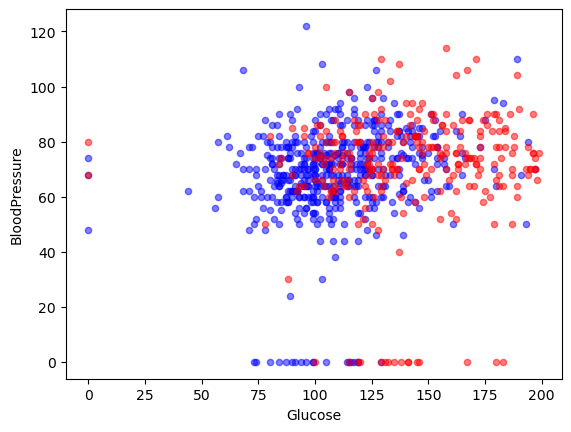

In [57]:
fig, ax = plt.subplots(1, 1)

# Outcome が 0 の行を抜き出して、x軸を Glucose 、 y軸を BloodPressure として青色の丸を散布する
df1[df1['Outcome'] == 0].plot(kind='scatter', x=u'Glucose', y=u'BloodPressure', ax=ax, 
                              c='blue', alpha=0.5)

# Outcome が 1 の行を抜き出して、x軸を Glucose 、 y軸を BloodPressure として赤色の丸を散布する
df1[df1['Outcome'] == 1].plot(kind='scatter', x=u'Glucose', y=u'BloodPressure', ax=ax, 
                              c='red', alpha=0.5)
plt.show()


ヒストグラムを作成

Text(0.5, 1.0, 'Histgram of Glucose')

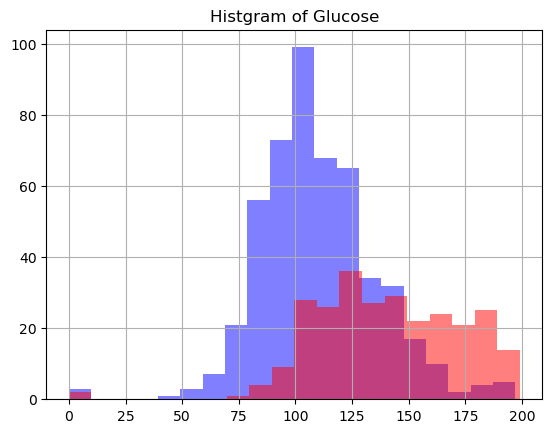

In [58]:
df1[df1['Outcome'] == 0]['Glucose'].hist(bins=20, alpha=0.5, color='blue')
df1[df1['Outcome'] == 1]['Glucose'].hist(bins=20, alpha=0.5, color='red')
plt.title('Histgram of Glucose')

Text(0.5, 1.0, 'Histgram of BloodPressure')

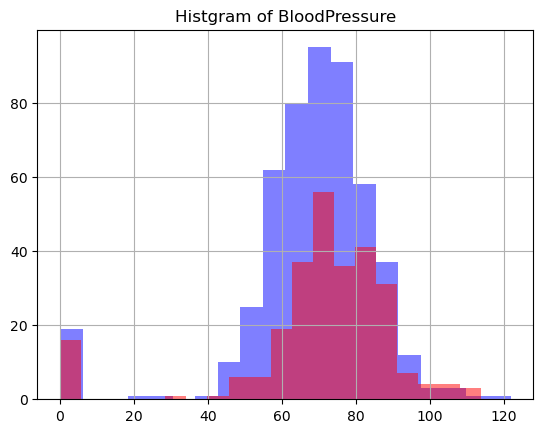

In [59]:
df1[df1['Outcome'] == 0]['BloodPressure'].hist(bins=20, alpha=0.5, color='blue')
df1[df1['Outcome'] == 1]['BloodPressure'].hist(bins=20, alpha=0.5, color='red')
plt.title('Histgram of BloodPressure')

分類にしたがって、各変数の散布図行列を作成

In [60]:
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df1['Outcome'].tolist()]

In [85]:
df1['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

散布図行列の作成  
NaNによってデータの欠損している行の削除をしているが、このデータセットの場合どのような値になっているか確認する必要がある  
colorsで色を指定しているが、`ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.`とエラーが出る

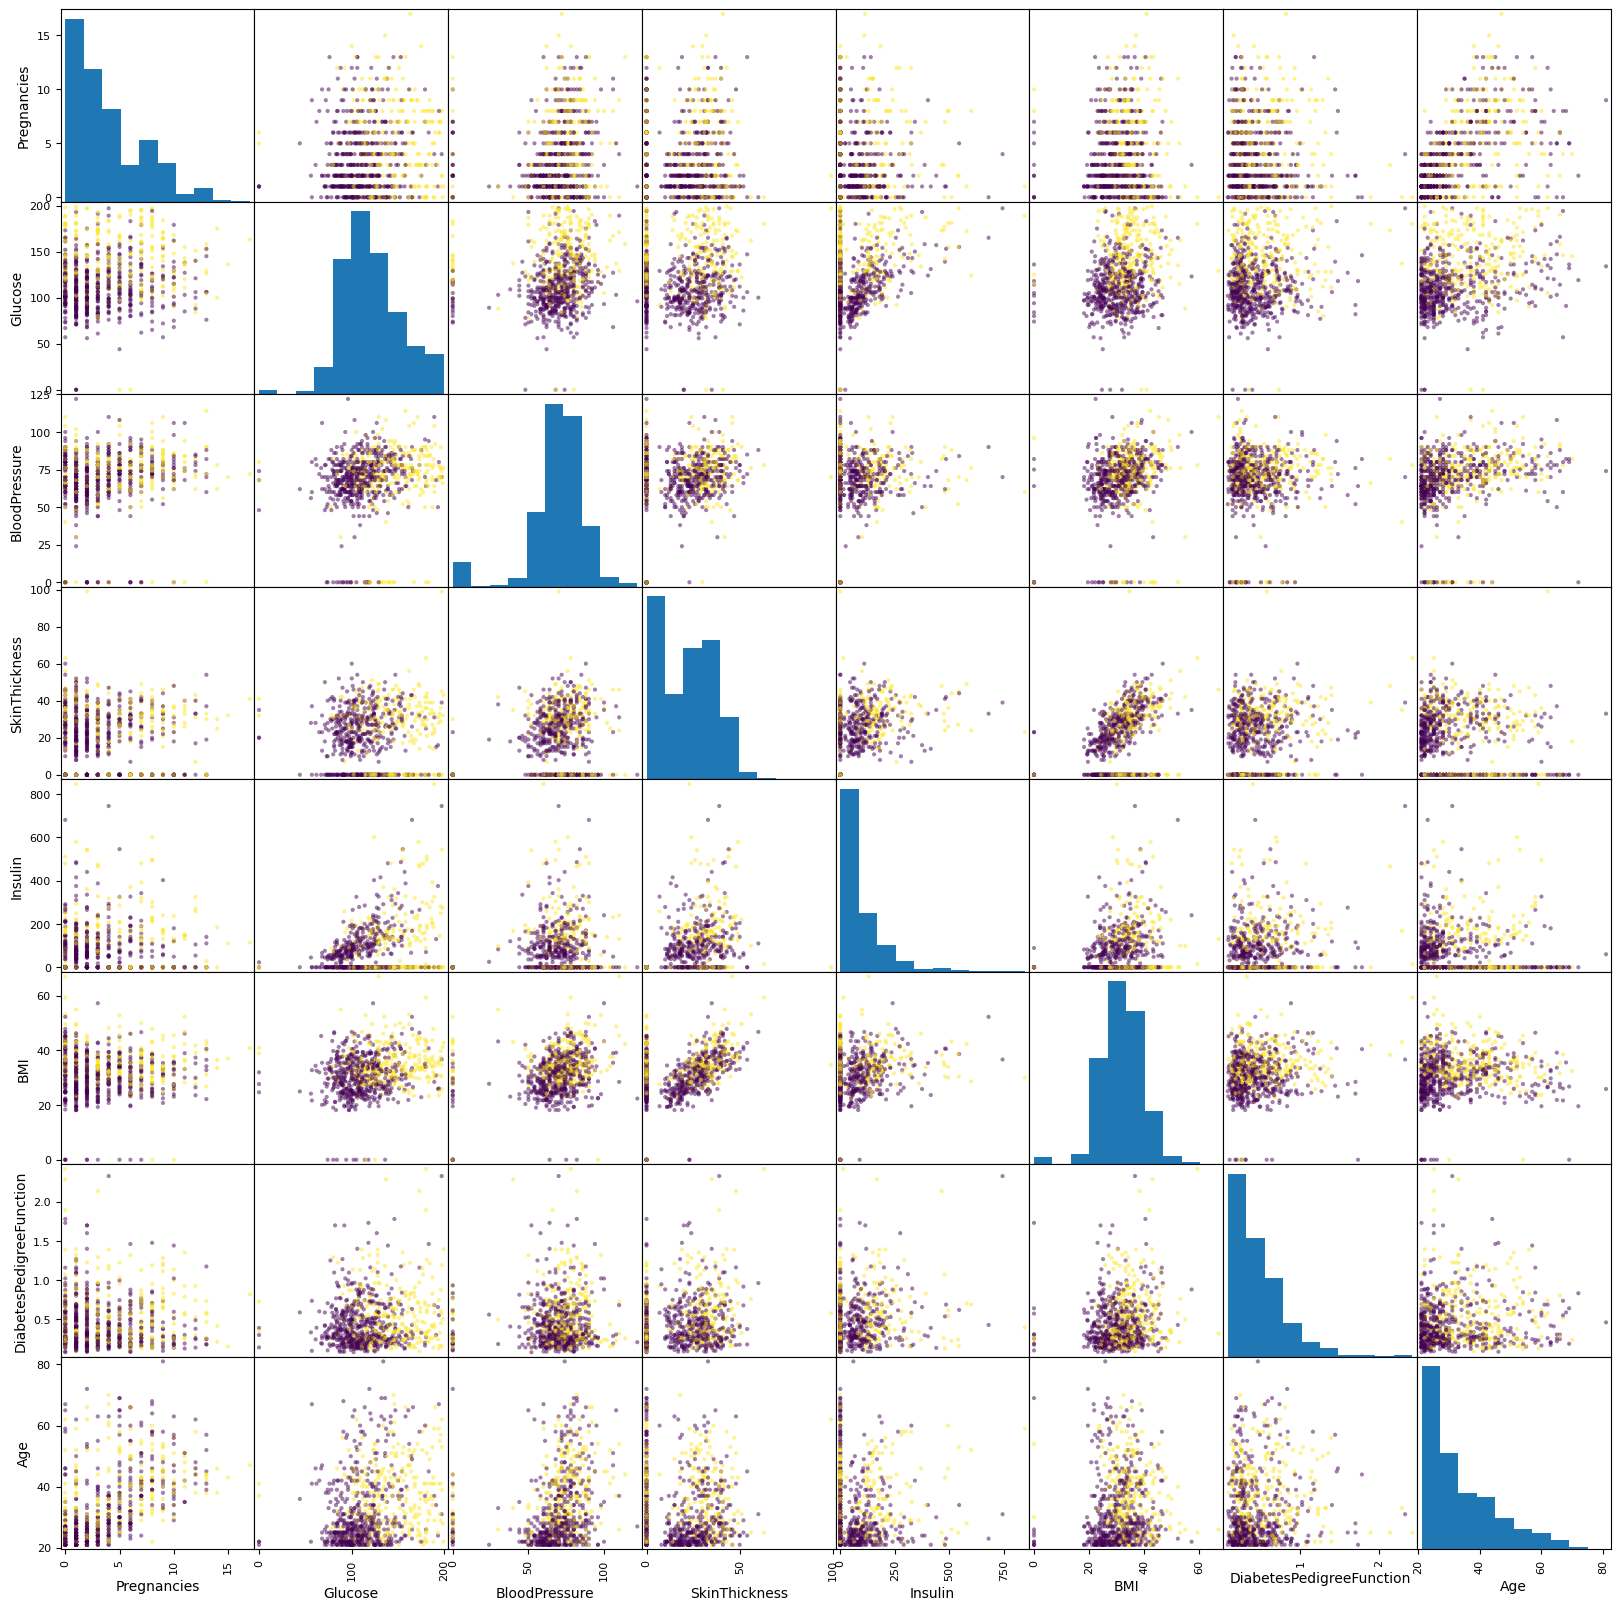

In [92]:
# plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:8]], figsize=(20, 20), color=colors, alpha=0.5) # error
plotting.scatter_matrix(df1[df1.columns[:8]], figsize=(20, 20), c=df1['Outcome'], alpha=0.5)
plt.show()

主成分分析